In [ ]:
import warnings
warnings.filterwarnings('ignore')
#For some basic operations
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from torchmetrics import ConfusionMatrix
confmat = ConfusionMatrix(num_classes=2)
from sklearn.metrics import balanced_accuracy_score
#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


In [2]:
#read data
initial_targets=pd.read_csv("bbbp.csv")
initial_features=pd.read_csv("bbbp_global_cdf_rdkit.csv")

As I said before, there are a number of columns in the feature matrix that *do not contain specific information*. (**constant** columns in data matrix)

In [3]:
initial_features=initial_features.loc[:, (initial_features != initial_features.iloc[0]).any()] 

In [4]:
initial_features.describe()

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)",...,"('fr_sulfide', <class 'numpy.float64'>)","('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
count,2039.000000,2039.000000,2039.000000,2.039000e+03,2.039000e+03,2039.000000,2.039000e+03,2039.000000,2039.000000,2.039000e+03,...,2.039000e+03,2.039000e+03,2.039000e+03,2.039000e+03,2039.000000,2039.000000,2.039000e+03,2.039000e+03,2039.000000,2039.000000
mean,0.604334,0.291380,0.337879,3.573345e-01,3.555512e-01,0.330076,3.722977e-01,0.364649,0.409469,4.051476e-01,...,9.710642e-02,2.501129e-02,9.808730e-03,7.846984e-03,0.177759,0.186164,1.618440e-02,8.005408e-02,0.201374,0.578456
std,0.312428,0.251739,0.293971,2.893572e-01,2.938552e-01,0.282478,2.921984e-01,0.292215,0.313242,3.164573e-01,...,2.961753e-01,1.561945e-01,9.857629e-02,8.825661e-02,0.087846,0.123671,1.262152e-01,2.681487e-01,0.166608,0.279008
min,0.000020,0.000577,0.000002,1.978982e-08,4.533712e-07,0.000001,2.678803e-07,0.000042,0.000001,2.209078e-07,...,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,2.324150e-16,4.703598e-08,0.166633,0.003427
25%,0.376547,0.082053,0.082985,9.334640e-02,8.693349e-02,0.085748,1.031724e-01,0.093407,0.112201,1.007599e-01,...,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,2.324150e-16,4.703598e-08,0.166633,0.370570
50%,0.684349,0.230083,0.243373,2.944113e-01,2.866005e-01,0.256325,3.198660e-01,0.309533,0.364833,3.658837e-01,...,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,2.324150e-16,4.703598e-08,0.166633,0.631207
75%,0.874519,0.438195,0.560798,5.762799e-01,5.794196e-01,0.538452,6.049746e-01,0.595135,0.661656,6.885461e-01,...,1.552592e-23,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.167380,2.324150e-16,4.703598e-08,0.166633,0.812874
max,0.999343,1.000000,0.999913,9.998828e-01,9.999034e-01,0.999915,9.998737e-01,0.999931,0.999863,9.998239e-01,...,1.000000e+00,9.999919e-01,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,0.999021


In [5]:
initial_targets.dropna().shape==initial_targets.shape and initial_features.dropna().shape==initial_features.shape 
#If the answer to this logical statement is True, then there is no missing data in this dataset.

True

In [6]:
shuffled_targets=initial_targets.sample(frac=1,random_state=1234).reset_index(drop=True)
shuffled_features=initial_features.sample(frac=1,random_state=1234).reset_index(drop=True)
#shuffling the data to randomize the sequence

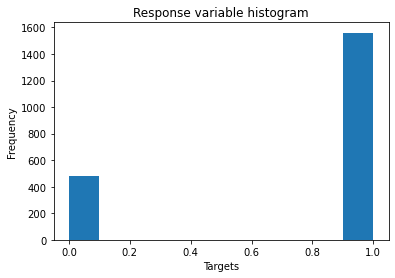

In [7]:
plt.hist(shuffled_targets["p_np"])
plt.xlabel('Targets')
plt.ylabel('Frequency')
plt.title("Response variable histogram")
plt.show()

My target variable is imbalanced, so I will use stratify in train_test_split.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_features,shuffled_targets["p_np"],test_size=0.1, random_state=1234, stratify=shuffled_targets["p_np"])

Imported version = 0.1.81.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
You supplied outputs = features
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1835, 186)
    Loaded train data. Shape = (1835, 186)
    Some column

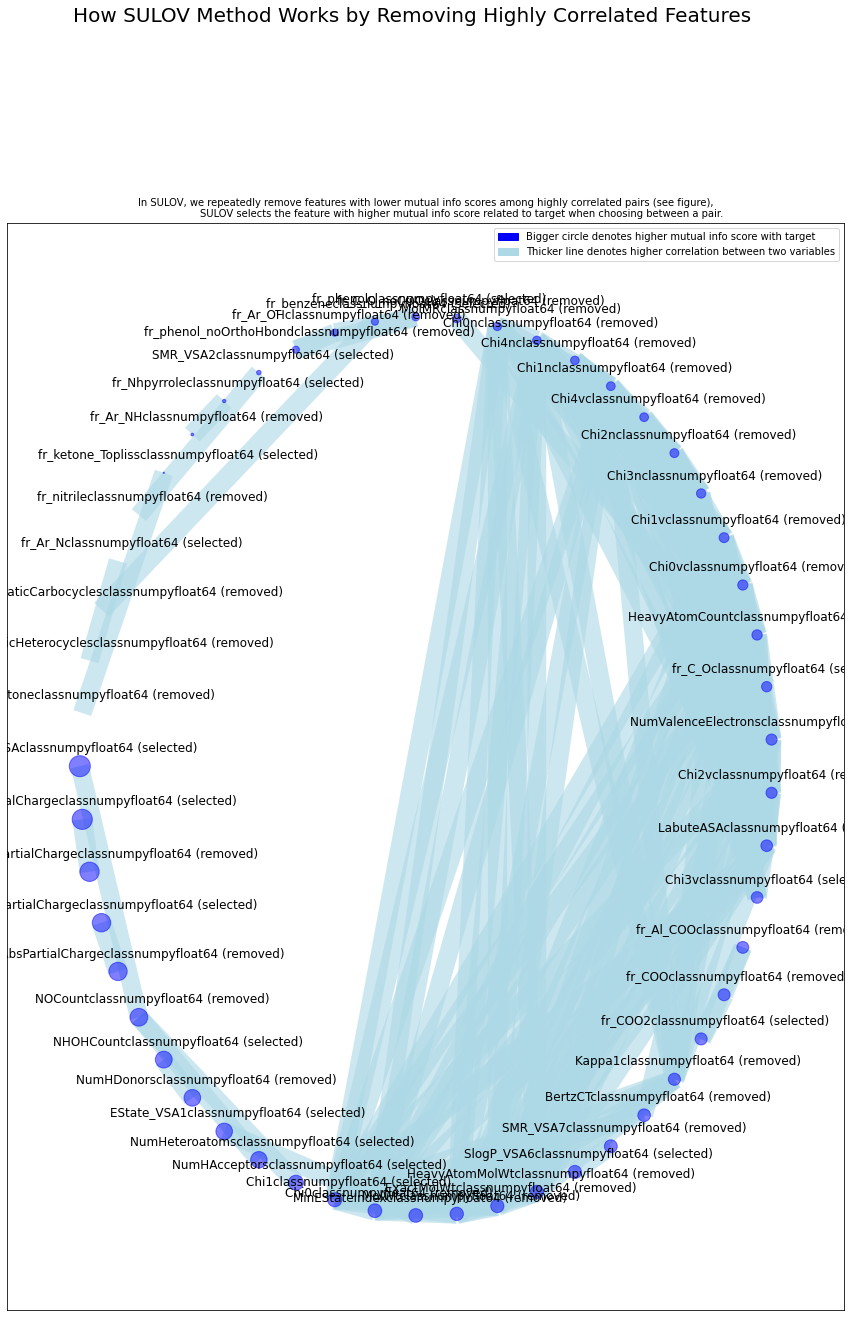

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 150
Final list of selected vars after SULOV = 150
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 150 
    XGBoost version: 1.5.1
Number of booster rounds = 100
        using 150 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 120 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 90 variables...
            Time taken for regular XGBoost feature sele

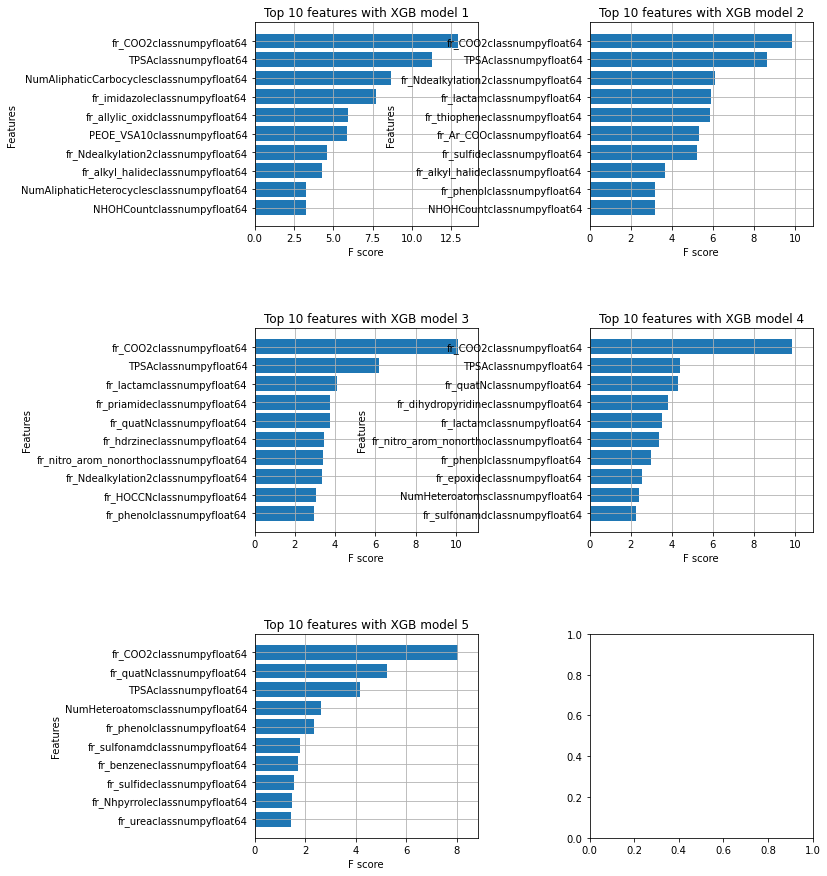

            Total time taken for XGBoost feature selection = 5 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 68 important features. Too many to print...

    Time taken for feature selection = 7 seconds
Returning 2 dataframes: dataname and test_data with 68 important features.


In [9]:
Data=pd.concat([X_train, y_train], axis=1) #reshape data for featurewiz feature selection
target = ['p_np']
from featurewiz import featurewiz 
feature_selection = featurewiz(Data, target, corr_limit=0.9, verbose=2,header=0, nrows=None,outputs="features")

In [10]:
X_train=X_train[feature_selection[0]]
X_test=X_test[feature_selection[0]]

In [11]:
class BbbpDataset (Dataset):
    def __init__(self,transform=None):
        #data loading
        self.x=X_train.to_numpy()
        self.y=y_train.to_numpy()
        self.x_test=X_test.to_numpy()
        self.y_test=y_test.to_numpy()
        self.n_samples=X_train.shape[0]
        self.n_samples_test=X_test.shape[0]
        self.transform=transform
    def __getitem__(self, index):
        sample=self.x[index], self.y[index]
        if self.transform:
            sample=self.transform(sample)
        return sample
    def __len__(self):
        return self.n_samples

class ToTensor():
    def __call__(self,sample):
        inputs,targets=sample
        inputs=torch.from_numpy(inputs.astype("float32"))
        targets=torch.tensor(targets.astype("float32"))
        #targets=targets.view(targets.shape[0],1)
        return inputs,targets
    
dataset = BbbpDataset(transform=ToTensor())    
train_loader = DataLoader(dataset=dataset,
                          batch_size=100,
                          shuffle=False)

dataiter = iter(train_loader)
data = dataiter.next()


In [12]:
#X_train=torch.tensor(X_train.values).float()
#y_train=torch.tensor(y_train.values).float()
#y_train=y_train.view(y_train.shape[0],1)
X_test=torch.tensor(X_test.values).float()
y_test=torch.tensor(y_test.values).float()
y_test=y_test.view(y_test.shape[0],1)

In [36]:
n_samples,n_features=X_train.shape
class NeuralNetwork (nn.Module):
    def __init__(self,n_input_features):
        super (NeuralNetwork, self).__init__()
        self.linear1=nn.Linear(n_input_features,4*math.floor(n_input_features/2))
        self.linear2=nn.Linear(4*math.floor(n_input_features/2),math.floor(n_input_features/2))
        self.linear3=nn.Linear(math.floor(n_input_features/2),math.floor(n_input_features/3))
        self.linear4=nn.Linear(math.floor(n_input_features/3),math.floor(n_input_features/6))
        self.linear5=nn.Linear(math.floor(n_input_features/6),1)
    def forward(self,x):
        out=torch.relu (self.linear1(x))
        out=torch.relu(self.linear2(out))
        out=torch.relu(self.linear3(out))
        out=torch.tanh(self.linear4(out))
        out=torch.sigmoid(self.linear5(out))
        y_predicted=out
        return y_predicted
    
model=NeuralNetwork(n_features)

#loss
learning_rate=0.0001
criterion=nn.BCELoss()
optimizer=torch.optim.Adamax(model.parameters(),lr=learning_rate)
# Dummy Training loop
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/100)
num_epochs=400
#training loop
print("enter to the loop")
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        labels=labels.view(labels.shape[0],1)
        #forward pass asn loss
        y_predicted=model(inputs)
        loss=criterion(y_predicted,labels)
        #backward pass
        loss.backward()
        #update
        optimizer.step()
        #zere gradient
        optimizer.zero_grad()
        if (i+1)%5==0 and (epoch+1)%100==0:
            #print(f"epoch {epoch+1}: loss={loss.item():.5f} ")
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| loss={loss:.6f}')


with torch.no_grad():
    y_predicted=model(X_test)
    y_predicted_cls=y_predicted.round()
    acc= y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
    #print(f'accuracy={acc:.4f}')
    a=confmat( y_predicted_cls.int(),y_test.int())    
    print(f'balanced_accuracy_score={balanced_accuracy_score(y_predicted_cls.int(),y_test.int()):.9f}      accuracy={acc:.9f}')
    print(a)

enter to the loop
Epoch: 100/400, Step 5/19| loss=0.214542
Epoch: 100/400, Step 10/19| loss=0.343294
Epoch: 100/400, Step 15/19| loss=0.335744
Epoch: 200/400, Step 5/19| loss=0.162034
Epoch: 200/400, Step 10/19| loss=0.311908
Epoch: 200/400, Step 15/19| loss=0.280500
Epoch: 300/400, Step 5/19| loss=0.135886
Epoch: 300/400, Step 10/19| loss=0.293169
Epoch: 300/400, Step 15/19| loss=0.228678
Epoch: 400/400, Step 5/19| loss=0.102825
Epoch: 400/400, Step 10/19| loss=0.282486
Epoch: 400/400, Step 15/19| loss=0.175670
balanced_accuracy_score=0.868020715      accuracy=0.887254894
tensor([[ 31,  17],
        [  6, 150]])


In [42]:
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    print(roc_auc_score(y_test, model(X_test)))

0.8920940170940171
